In [1]:
import meshio
import numpy as np

mesh = meshio.read("D:/802020_1ulh_pronghorn/geo.stl")

In [57]:
U=array(udata.iloc[:,0:2])
C=array(cdata.iloc[:,0:2])

In [58]:
C

array([[8.21039782e-05, 1.83485029e-04],
       [8.10725478e-05, 1.84101031e-04],
       [8.16249808e-05, 1.84102408e-04],
       ...,
       [4.17952620e-04, 3.02534642e-04],
       [4.18015441e-04, 3.02920433e-04],
       [4.18029138e-04, 3.03059514e-04]])

In [54]:
import pandas as pd
from numpy import genfromtxt
from numba import njit
from numpy import where,array,delete,s_
import dask.dataframe

ufile='C:/Users/marcb/Desktop/OF_slices/U_802020_1ulh.csv'
cfile='C:/Users/marcb/Desktop/OF_slices/C_802020_5ulh.csv'
#ufile="D:/402020_1ulh_pronghorn/slice.csv"
#dfile='C:/Users/marcb/Desktop/OF_experimental_simulation/OF_401020_1ulh_2dcorrected/data.csv'
#cfile='C:/Users/marcb/Desktop/C_4010_2dsim.csv'
#ufile='C:/Users/marcb/Desktop/Umag_4010_2dsim.csv'

#cfile="D:\802020_1ulh_pronghorn\slice_geo.csv"

#df=pd.read_csv('C:/Users/marcb/Desktop/U_802020_1ulh.csv')
udata = dask.dataframe.read_csv(ufile)
cdata = dask.dataframe.read_csv(cfile)
#data = dask.dataframe.read_csv(dfile)


U=array(udata.iloc[:,1:3])
#shear=array(data.iloc[:,8:14])
C=array(cdata)

#C2=C[0:len(U)]
print (U.shape,  C.shape)

KeyboardInterrupt: 

In [50]:
U=array(data.iloc[:,3:6])
C=array(data.iloc[:,1:3])
print (U.shape,  C.shape)
U
ux=U[:,0]
uz=U[:,2]
uz

(9037552, 3) (9037552, 2)


array([1.2178e-05, 1.6464e-05, 1.6747e-05, ..., 1.5613e-07, 1.1239e-07,
       5.1783e-08])

In [60]:
import numpy as np

norm_points=np.round(C/2.77083333e-7);
#norm_points=np.round(C/1.75e-7)

#umag=np.sqrt(U[:,0]**2+U[:,1]**2+U[:,2]**2)
#shear_mag=np.sqrt(shear[:,0]**2+shear[:,1]**2+shear[:,2]**2+shear[:,3]**2+shear[:,4]**2+shear[:,5]**2)
norm_points = norm_points.astype(int)
#print (norm_points.shape,umag.shape,shear_mag.shape)
#norm_points[:,1]=norm_points[:,1]+9
norm_points

array([[ 296,  662],
       [ 293,  664],
       [ 295,  664],
       ...,
       [1508, 1092],
       [1509, 1093],
       [1509, 1094]])

In [70]:
norm_points[norm_points<0]=0
norm_points

array([[ 296,  662],
       [ 293,  664],
       [ 295,  664],
       ...,
       [1508, 1092],
       [1509, 1093],
       [1509, 1094]])

In [72]:
ux=U[:,0]
uz=U[:,1]

In [74]:
from numba import njit
from numpy import where,array,delete,s_

@njit
def find_rows(source, target):
    return where((source[:,0] == target[0])&(source[:,1] == target[1]))[0]

def loop_numba(umagx,umagz,bound,vel_mask):

    for i in range(0,4096):
        if i%20==0:
            #np.save('402020_shear',shear_mask)
            np.save('802020_velz_2dsim',vel_maskz)
            np.save('802020_velx_2dsim',vel_maskx)
        print (i)
        for j in range(0,4096):
            a=array([i, j],dtype=int)
            idx_bound=find_rows(bound,a)

            if idx_bound.size != 0:
                if idx_bound.size>1:
                    idx_bound=idx_bound[0]
                vel_maskx[i,j]=umagx[idx_bound];
                vel_maskz[i,j]=umagz[idx_bound];
                #shear_mask[i,j]=shear_mag[idx_bound]; 
                #bound=delete(bound,idx_bound,0)
    return [vel_maskx, vel_maskz]#[shear_mask, vel_mask]

In [76]:
vel_maskx=np.zeros([2400,2400])
vel_maskz=np.zeros([2400,2400])

#shear_mask=np.zeros([2400,2400])
#shear_mask=np.load('402020_shear.npy')
#vel_mask=np.load('402020_vel.npy')
#loop_numba(umag,shear_mag,norm_points,vel_mask,shear_mask)
loop_numba(ux,uz,norm_points,vel_mask)

0


IndexError: index 201932089 is out of bounds for axis 0 with size 201766329

In [80]:
ux.shape
norm_points.shape

(212197086, 2)

In [83]:
import matplotlib.pyplot as plt
import numpy as np
mask=np.load('802020_vals.npy')


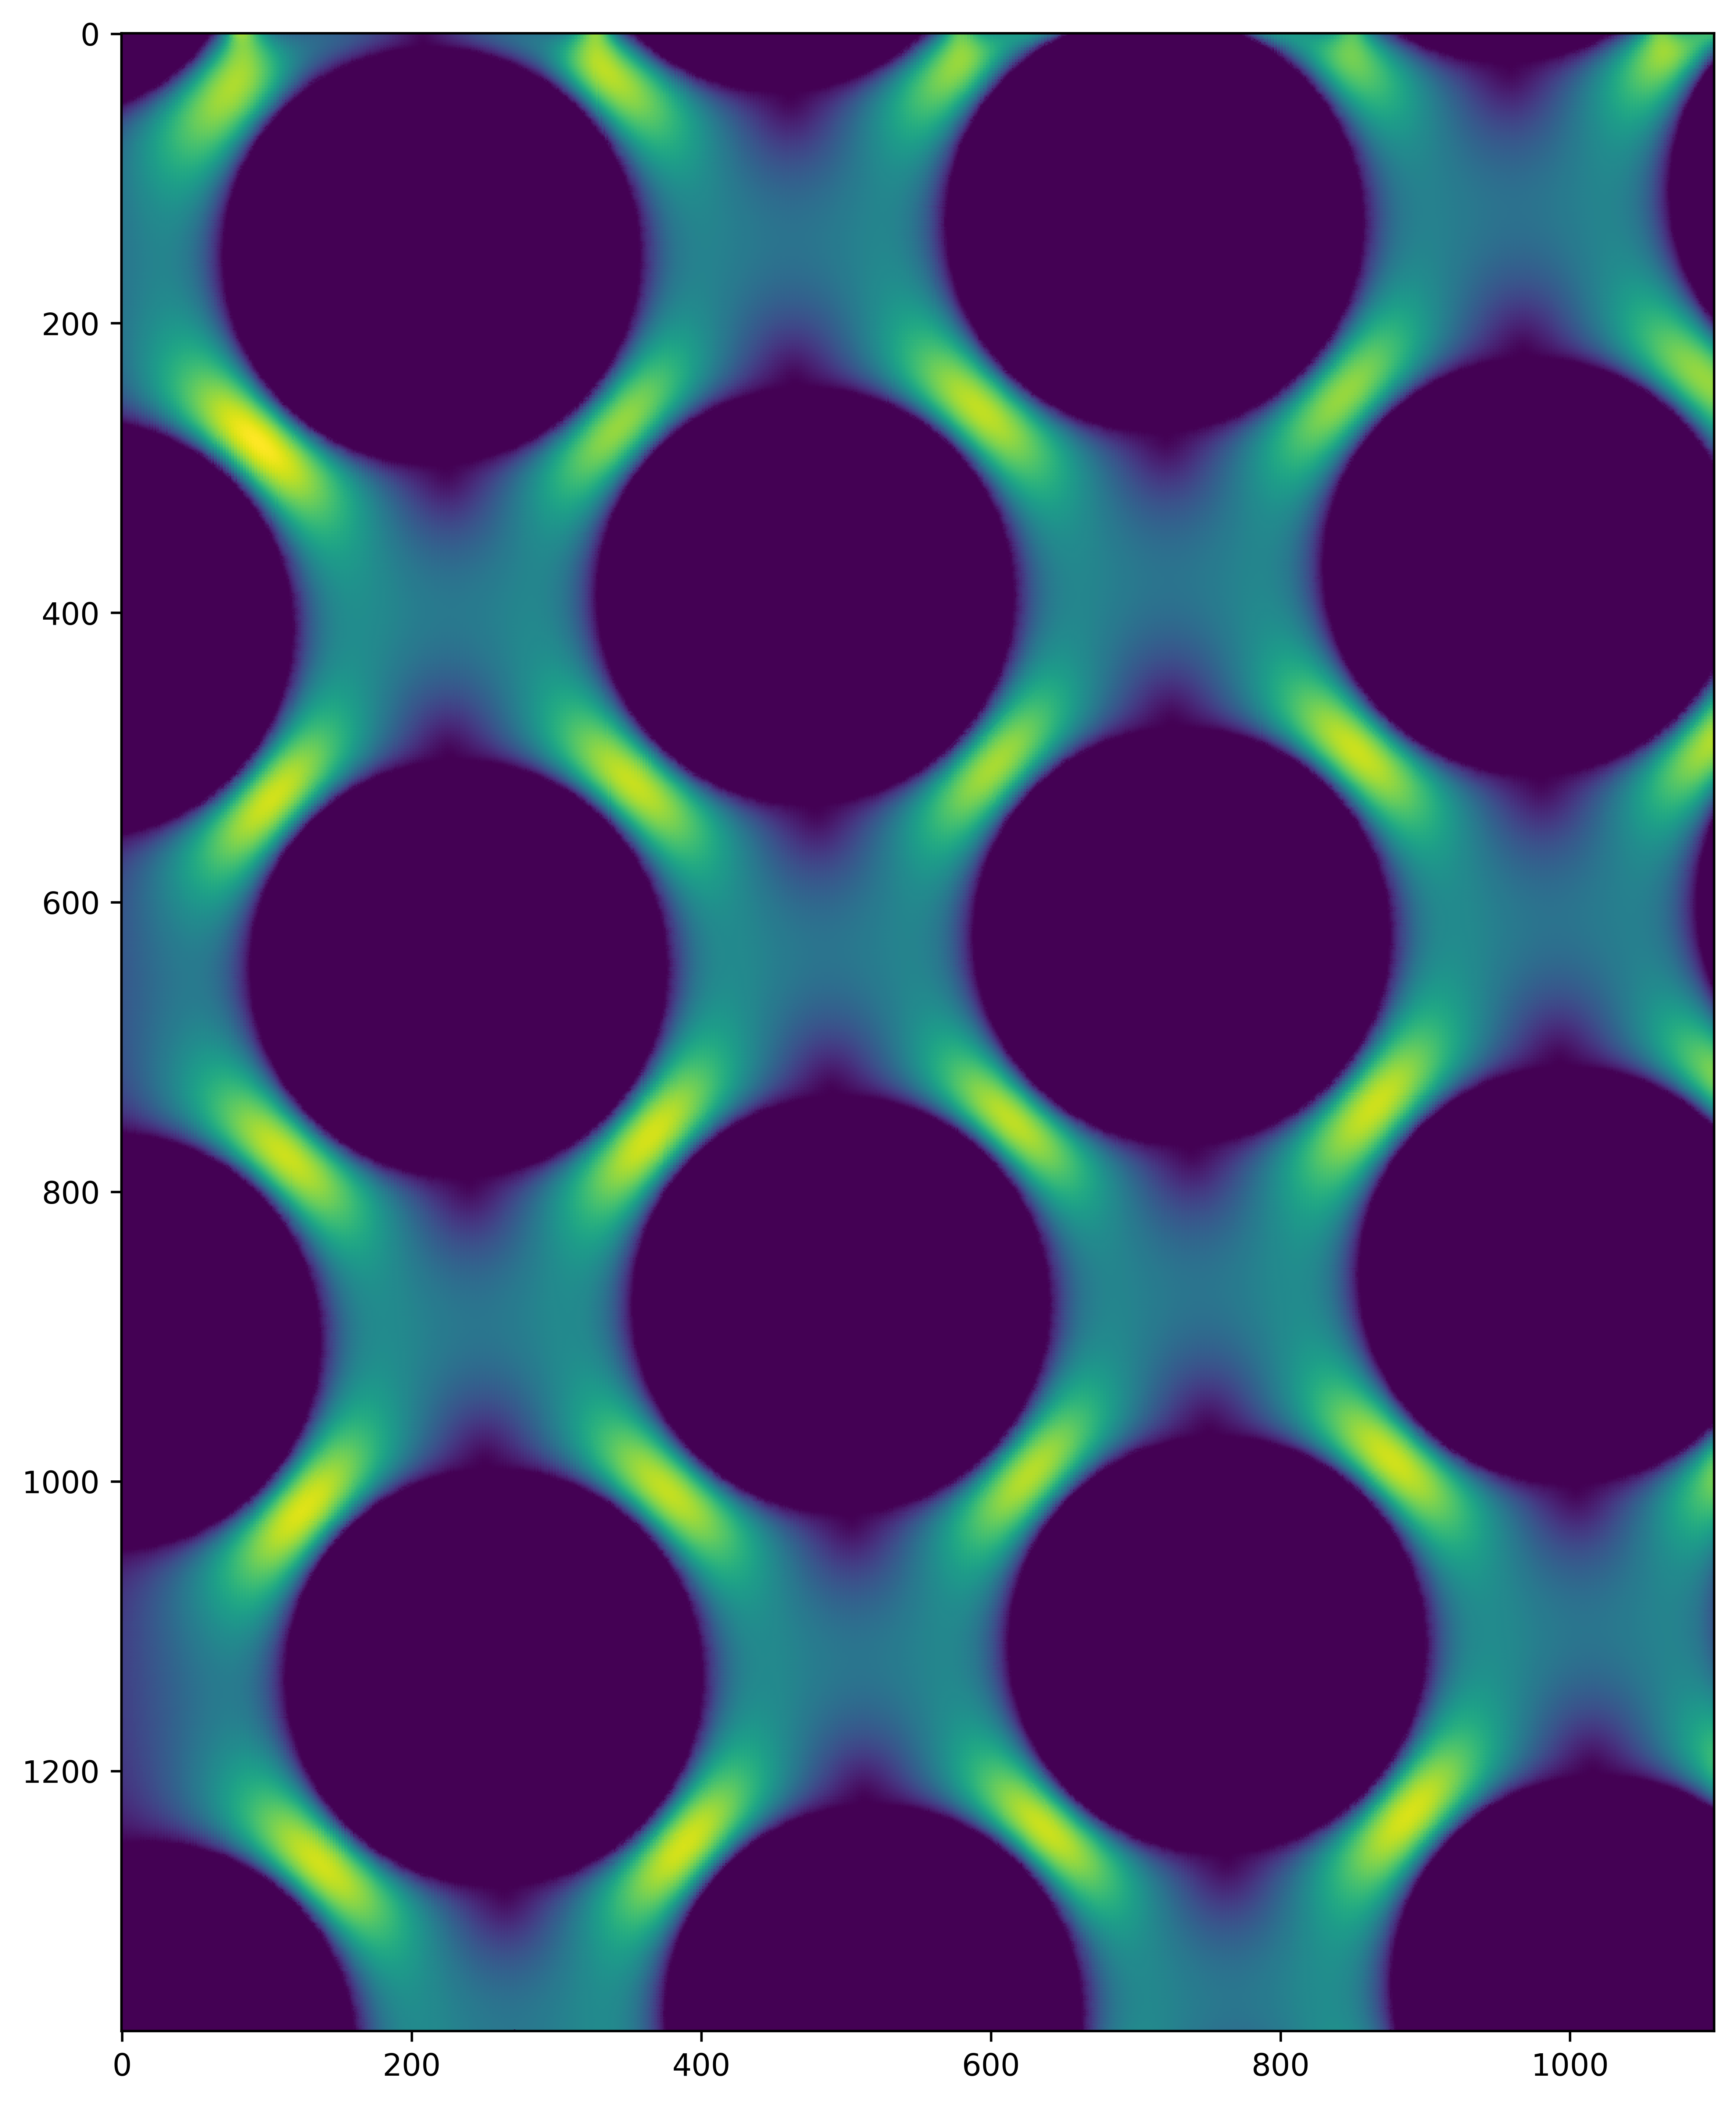

In [87]:
from matplotlib.pyplot import figure

figure(figsize=(12, 12), dpi=600)
plt.imshow(mask[20:1400,100:1200])
#plt.imshow(np.transpose(im[115:435,90:390]),norm=colors.LogNorm(vmin=1e-6,vmax=0.0002))


In [85]:

for n in range(1):
    for i in range(2,2399):
        for j in range(2,2399):
            if mask[i,j]==0:
                if ((mask[i+1,j]!=0)&(mask[i,j+1]!=0)&(mask[i-1,j]!=0)&(mask[i,j-1]!=0)):
                    mask[i,j]=(mask[i+1,j]+mask[i-1,j]+mask[i,j+1]+mask[i,j-1])/4

In [86]:
np.savetxt('802020_1ulh_vel.csv', mask )

In [17]:
import cv2
def me(image):
    x,y,w,h = cv2.boundingRect(image)
    cv2.floodFill(image,None,(int(x+w/2),int(y+h/2)),255)
    return image

In [18]:
def findfill(image):
    thresh = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    cv2.fillPoly(image, cnts, [255,255,255])

In [38]:
from PIL import Image
#only works with arrays in range 0-255
myarr=np.uint8(mask[:,:])
im=Image.fromarray(myarr)
im.save('802020_1ulh_vel.png')
plt.imshow(im)

OSError: cannot write mode F as JPEG